In [1]:
import os
import sys

# Cambiar el directorio para cargar la librería y datos correctamente.
os.chdir(sys.path[0])
os.chdir('../')
print("Directorio actual: {0}".format(os.getcwd()))

Directorio actual: C:\Users\good-\Documents\Projects\simple-object-detection


# Configurar notebook y dependencias

In [2]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from simple_object_detection.detection_model import DetectionModel

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (30, 12)

Evitar los mensajes de tensorflow-hub.

In [4]:
import logging

# No funciona...
tf.get_logger().setLevel('ERROR')
logging.getLogger('tensorflow_hub').setLevel('ERROR')
logging.getLogger('simple_object_detection').setLevel('ERROR')

## Configurar datos de ejemplo

Configurar la ruta de los modelos

In [5]:
DetectionModel.models_path = 'models_data/'

Configurar la ruta de los datos de ejemplo y una imagen de ejemplo

In [6]:
file_path = 'sample_data/'

In [7]:
from simple_object_detection.utils import load_image

image = load_image(file_path + 'yunquera-4.jpg')

# Ejecuciones con distintas redes

In [8]:
from simple_object_detection.utils import set_bounding_boxes_in_image, filter_objects

def show_detections_in_image(network, image, title):
  # Extraer objetos
  objects = network.get_objects(image)
  objects_filtered = filter_objects(objects,
                                    # classes=['motorcycle', 'motorbike', 'wheel', 'car', 'truck', ],
                                    min_score=0.3)
  # Extraer el frame vacío, con todos los objetos y con los objetos filtrados.
  image_with_boxes = set_bounding_boxes_in_image(image, objects)
  image_with_boxes_filtered = set_bounding_boxes_in_image(image, objects_filtered)
  # Añadir los centroides a la imagen con los objetos filtrados
  for obj in objects_filtered:
    cv2.circle(image_with_boxes_filtered, obj.get_centroid(), 2, (255, 0, 0), 3)
  # Imprimir las imágenes.
  fig, axes = plt.subplots(1, 2)
  fig.suptitle(title, size=25)
  axes[0].imshow(image_with_boxes)
  axes[0].set_title('Image with all detections')
  axes[1].imshow(image_with_boxes_filtered)
  axes[1].set_title('Image with filtered detections and centroids')

  return image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered

## Modelo: YOLOv3

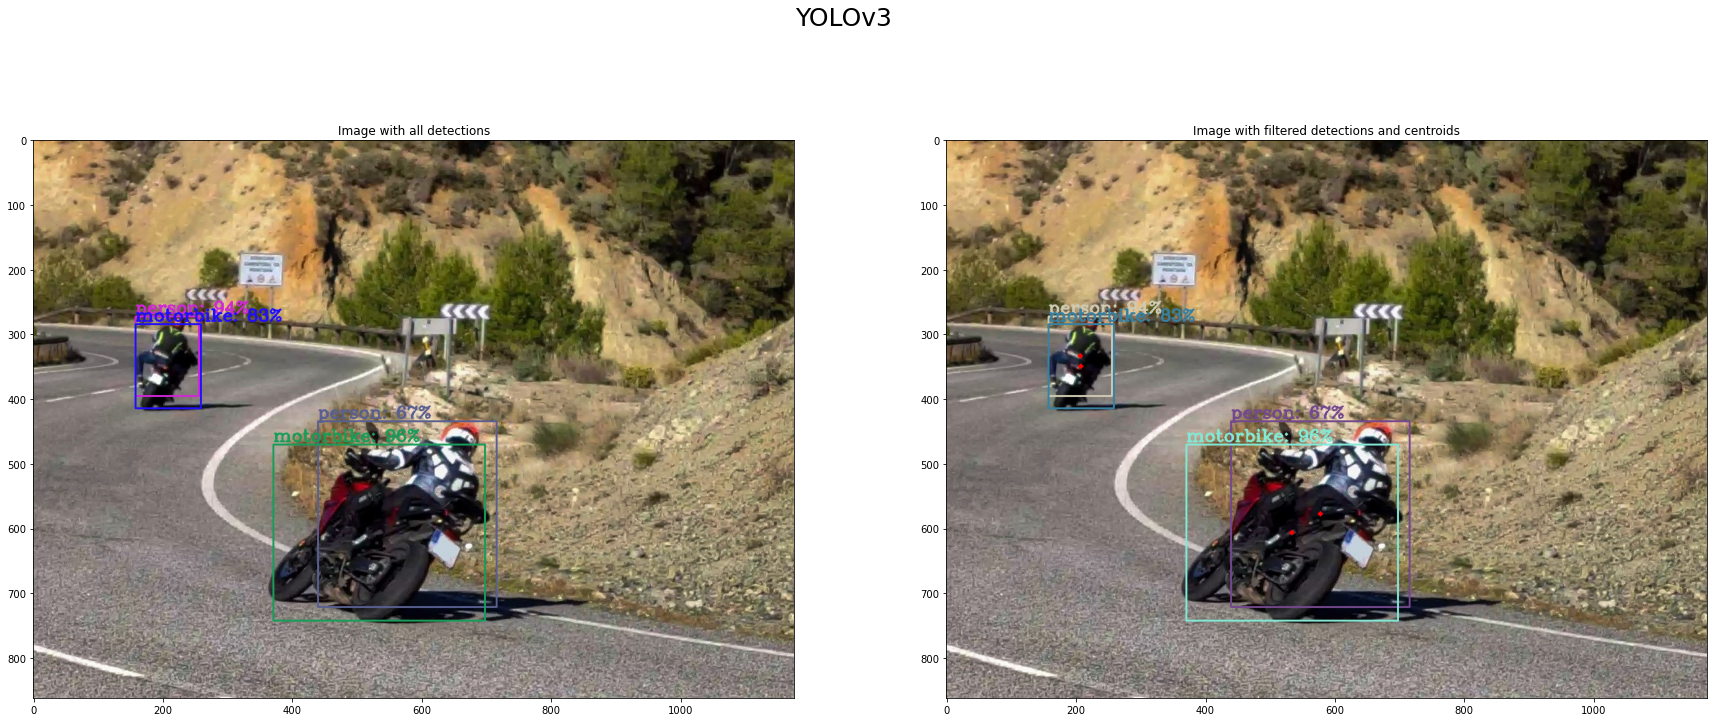

In [9]:
from simple_object_detection.models import YOLOv3

network = YOLOv3(size=(608, 608), offline_mode=True)
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'YOLOv3')

## Modelo: SSD+MobileNetV2

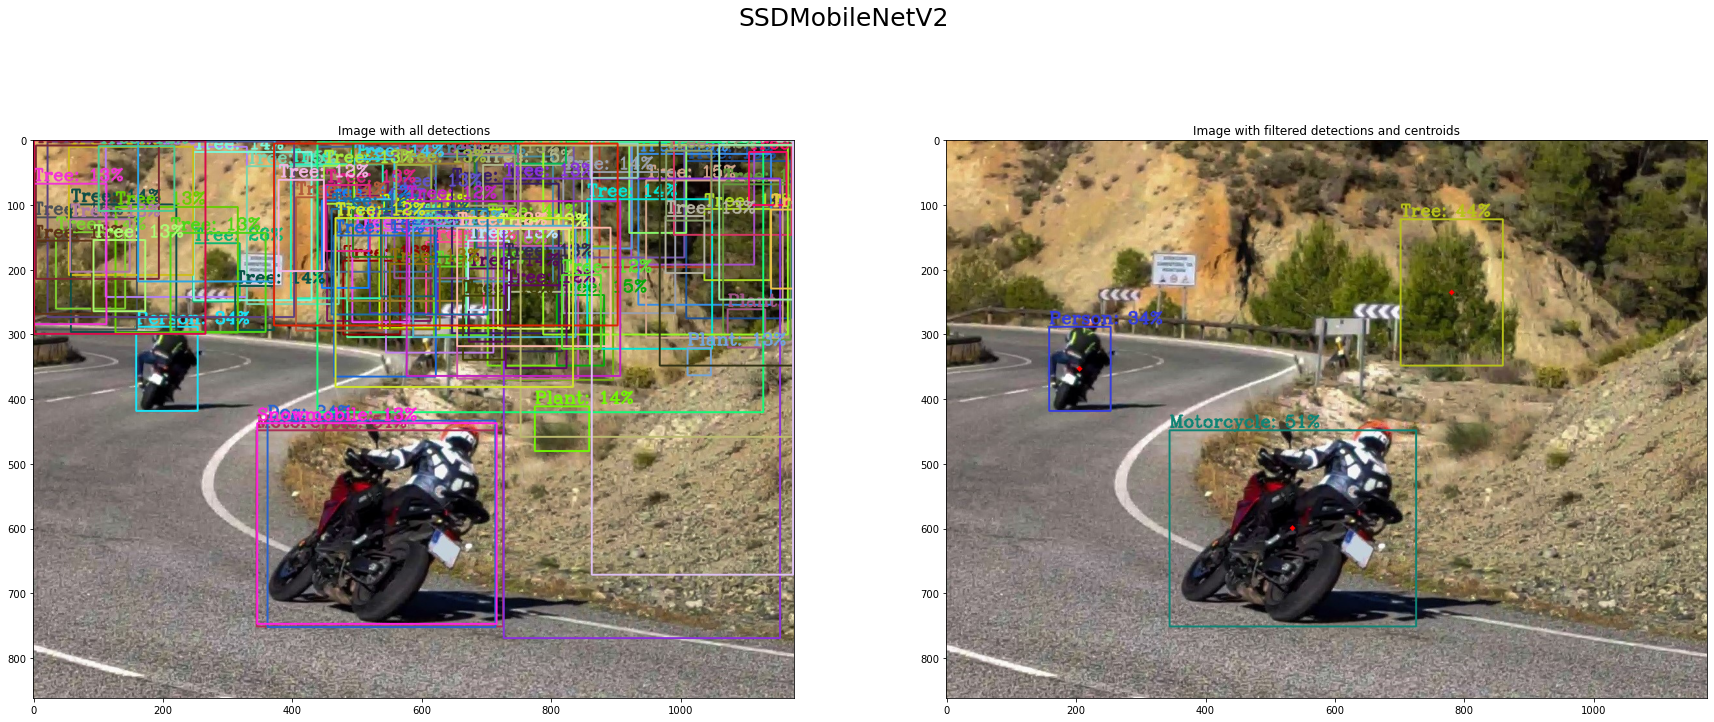

In [10]:
from simple_object_detection.models import SSDMobileNetV2

network = SSDMobileNetV2(offline_mode=True)
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'SSDMobileNetV2')

## Modelo: CenterNet HourGlass104 512x512

In [ ]:
from simple_object_detection.models import CenterNetHourGlass104512x512

network = CenterNetHourGlass104512x512(offline_mode=False)
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'CenterNetHourGlass104512x512')

## Modelo: CenterNet HourGlass104 1024x1024

In [ ]:
from simple_object_detection.models import CenterNetHourGlass1041024x1024

network = CenterNetHourGlass1041024x1024(offline_mode=True)
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'CenterNetHourGlass1041024x1024')

## Modelo: FasterRCNN+InceptionResNetV2

In [ ]:
from simple_object_detection.models import FasterRCNNInceptionResnetV2

network = FasterRCNNInceptionResnetV2(offline_mode=True)
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'FasterRCNNInceptionResnetV2')